In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
sentiment = pd.read_csv('sent_embedding_growth_sentiment_0704_embed_12_layers.csv')
cos_similiarty =pd.read_csv('cos_similarity_sent_embed_0704_embed_12_layers.csv')
sentiment.sentence =sentiment.sentence.str.replace('"','')

In [4]:
sentiment
cos_similiarty

,Unnamed: 0,sentence,date,inflation,growth,employment,unemployment,economic
0,1,"i'm delighted to return ""home"" to the federal ...",20111129.0,0.531590,0.535393,0.546399,0.530512,0.563551
1,2,in my remarks this morning i will underscore t...,20111129.0,0.496236,0.508341,0.504752,0.480107,0.520669
2,4,the recovery in the united states and other ad...,20111129.0,0.550722,0.533600,0.554626,0.550370,0.549842
3,5,there have also been clear signs of slowing gr...,20111129.0,0.540027,0.548640,0.533453,0.513150,0.549344
4,6,"in effect, we face a dearth of aggregate deman...",20111129.0,0.554580,0.531894,0.533133,0.522904,0.552104
...,...,...,...,...,...,...,...,...
53585,62874,the bank's ratio would be compared to a minimu...,20200108.0,0.504698,0.512615,0.521967,0.508952,0.516348
53586,62875,the minimum activity threshold would be calibr...,20200108.0,0.557364,0.552772,0.553102,0.542681,0.568401
53587,62876,board of governors of the federal reserve syst...,20200108.0,0.499191,0.520057,0.526042,0.510054,0.531309
53588,62877,"lael brainard, ""the community reinvestment act...",20200108.0,0.501222,0.522341,0.533798,0.509174,0.532200


In [5]:
sentiment

,sentence,logit,prediction,sentiment_score
0,the pace of economic growth in the second half...,[0.98324597 0.01303698 0.00371704],positive,0.970209
1,"in recognition of these drags, the consensus o...",[0.00751129 0.9828555 0.00963327],negative,-0.975344
2,exhibit 1 shows that the saving rate rose from...,[0.98985136 0.00505358 0.00509508],positive,0.984798
3,it now appears that consumer spending is advan...,[0.99066424 0.00426569 0.00507011],positive,0.986399
4,"in the pre-crisis years, consumer spending gre...",[0.9827732 0.00364505 0.01358175],positive,0.979128
...,...,...,...,...
2399,by being inclusive in their lending and invest...,[0.9539882 0.00235218 0.04365968],positive,0.951636
2400,it starts by creating two tests: a retail test...,[0.00652366 0.0070367 0.98643965],neutral,-0.000513
2401,only larger banks would be expected to meet th...,[0.02613581 0.00283166 0.9710325 ],neutral,0.023304
2402,community development testâmeasuring lending...,[0.01131412 0.00412435 0.9845615 ],neutral,0.007190


In [6]:
merged_df = sentiment.merge(cos_similiarty, how = 'right', left_on = 'sentence', right_on = 'sentence')
merged_df = merged_df.loc[~merged_df.prediction.isna()]
merged_df = merged_df.groupby('date').mean('sentiment_score')

In [7]:
import time
from time import strftime
merged_df.index =merged_df.index.astype(int)
merged_df

,sentiment_score,Unnamed: 0,inflation,growth,employment,unemployment,economic
date,,,,,,,
20110107,0.738631,6197.687500,0.533940,0.549714,0.537311,0.520474,0.539449
20110108,-0.122393,6050.000000,0.551644,0.556378,0.550047,0.539220,0.545844
20110202,0.841393,5860.500000,0.528383,0.549029,0.542713,0.527109,0.542830
20110203,0.803315,5649.200000,0.520554,0.531369,0.523166,0.504792,0.527937
20110210,-0.979793,11412.500000,0.567979,0.569610,0.563429,0.558464,0.554292
...,...,...,...,...,...,...,...
20200227,0.576606,61632.800000,0.555160,0.572365,0.564490,0.549254,0.563378
20200513,-0.325924,61440.666667,0.555450,0.566143,0.555241,0.542132,0.555364
20200521,-0.492661,61329.500000,0.521704,0.529560,0.517427,0.511360,0.527340


In [8]:
merged_df.index = merged_df.index.astype(str)

In [9]:
merged_df['year'] = merged_df.index.str[:4]
merged_df['month'] = merged_df.index.str[4:6]
merged_df = merged_df.groupby(['year', 'month']).mean('sentiment_score')

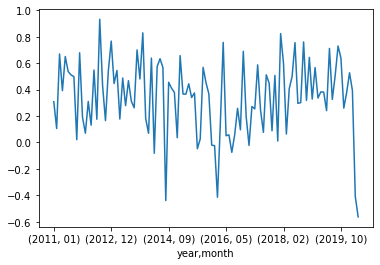

In [10]:
merged_df['sentiment_score'].plot()

In [11]:
macro_indicator = pd.read_csv('macro_indicators.csv').set_index('Date')
macro_indicator.index =macro_indicator.index.astype(int)
macro_indicator.index = macro_indicator.index.astype(str)
macro_indicator = macro_indicator.sort_index()
macro_indicator = macro_indicator.loc['20110101':]
macro_indicator

,unemployment,fed interest rate,growth rate,Average GBP/USD
Date,,,,
20110101,9.1,0.17,1.550836,1.577022
20110201,9.0,0.16,1.550836,1.612672
20110301,9.0,0.14,1.550836,1.615125
20110401,9.1,0.10,1.550836,1.635650
20110501,9.0,0.09,1.550836,1.634392
...,...,...,...,...
20191101,3.5,1.55,2.350000,1.288583
20191201,3.5,1.55,2.350000,1.311692
20200101,3.6,1.55,NaN,1.307060


In [12]:
growth_sentiment = merged_df['sentiment_score'].reset_index()
growth_sentiment.index = growth_sentiment['year'] + growth_sentiment['month'] + '01'
growth_sentiment

,year,month,sentiment_score
20110101,2011,01,0.308119
20110201,2011,02,0.104880
20110301,2011,03,0.669398
20110401,2011,04,0.391585
20110501,2011,05,0.649871
...,...,...,...
20191201,2019,12,0.378462
20200101,2020,01,0.526937
20200201,2020,02,0.392596
20200501,2020,05,-0.409293


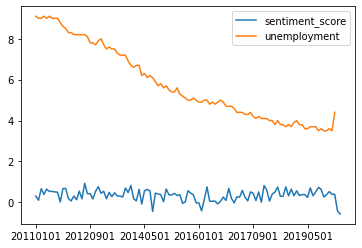

In [13]:
growth_analytics = pd.concat([growth_sentiment, macro_indicator], axis = 1)
growth_analytics = growth_analytics.sort_index()
growth_analytics['sentiment_score'] = growth_analytics['sentiment_score'].fillna(method='ffill')
growth_analytics['growth rate']= growth_analytics['growth rate'].fillna(method='ffill')
growth_analytics[['sentiment_score','unemployment']].corr()
growth_analytics[['sentiment_score','unemployment']].plot()

In [14]:
from statsmodels.api import OLS
OLS(growth_analytics['growth rate'],growth_analytics['sentiment_score']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            growth rate   R-squared (uncentered):                   0.597
Model:                            OLS   Adj. R-squared (uncentered):              0.593
Method:                 Least Squares   F-statistic:                              166.0
Date:                Wed, 14 Jul 2021   Prob (F-statistic):                    7.55e-24
Time:                        20:03:39   Log-Likelihood:                         -202.09
No. Observations:                 113   AIC:                                      406.2
Df Residuals:                     112   BIC:                                      408.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
sentiment_score     3.9517      0.307     12.883      0.000       3.344       4.559
==============================================================================
Omnibus:                        6.140   Durbin-Watson:                   1.026
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                5.692
Skew:                           0.452   Prob(JB):                       0.0581
Kurtosis:                       3.627   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
growth_analytics

,year,month,sentiment_score,unemployment,fed interest rate,growth rate,Average GBP/USD
20110101,2011,01,0.308119,9.1,0.17,1.550836,1.577022
20110201,2011,02,0.104880,9.0,0.16,1.550836,1.612672
20110301,2011,03,0.669398,9.0,0.14,1.550836,1.615125
20110401,2011,04,0.391585,9.1,0.10,1.550836,1.635650
20110501,2011,05,0.649871,9.0,0.09,1.550836,1.634392
...,...,...,...,...,...,...,...
20200101,2020,01,0.526937,3.6,1.55,2.350000,1.307060
20200201,2020,02,0.392596,3.5,1.58,2.350000,1.296770
20200301,NaN,NaN,0.392596,4.4,0.65,2.350000,1.237805
20200501,2020,05,-0.409293,NaN,NaN,2.350000,NaN


In [16]:
sentiment = pd.read_csv('sent_embedding_employment_sentiment_0704_embed_12_layers.csv')
sentiment.sentence =sentiment.sentence.str.replace('"','')
merged_df = sentiment.merge(cos_similiarty, how = 'right', left_on = 'sentence', right_on = 'sentence')
merged_df = merged_df.loc[~merged_df.prediction.isna()]
merged_df = merged_df.groupby('date').mean('sentiment_score')

In [17]:
merged_df.index =merged_df.index.astype(int)
merged_df.index = merged_df.index.astype(str)
merged_df['year'] = merged_df.index.str[:4]
merged_df['month'] = merged_df.index.str[4:6]
merged_df = merged_df.groupby(['year', 'month']).mean('sentiment_score')
merged_df

sentiment_score    Unnamed: 0  inflation    growth  employment  \
year month                                                                   
2011 01            0.100670   6123.772894   0.532857  0.536555    0.549660   
     02            0.100854   6774.023242   0.522030  0.525890    0.541105   
     03            0.079253   5043.924672   0.523222  0.524696    0.539810   
     04            0.115976   4333.562982   0.524314  0.529847    0.543739   
     05            0.279954   3591.822353   0.522642  0.528189    0.542853   
...                     ...           ...        ...       ...         ...   
2020 01            0.279570  62687.589414   0.524048  0.531938    0.546329   
     02            0.226381  61975.443705   0.528696  0.535108    0.550000   
     04            0.114047  61521.733333   0.532500  0.528453    0.548128   
     05            0.106366  61423.943100   0.523883  0.530771    0.546841   
     06            0.202723  61210.247619   0.527542  0.532784    0.549162   

            unemployment  economic  
year month                          
2011 01         0.533449  0.542738  
     02         0.525358  0.533759  
     03         0.524159  0.534346  
     04         0.527156  0.537306  
     05         0.524335  0.536992  
...                  ...       ...  
2020 01         0.527484  0.539671  
     02         0.532047  0.543659  
     04         0.536148  0.541034  
     05         0.529739  0.539207  
     06         0.533111  0.542175  

[109 rows x 7 columns]

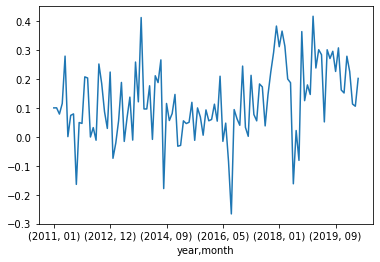

In [18]:
merged_df['sentiment_score'].plot()

In [19]:
employment_sentiment = merged_df['sentiment_score'].reset_index()
employment_sentiment.index = employment_sentiment['year'] + employment_sentiment['month'] + '01'
employment_sentiment

,year,month,sentiment_score
20110101,2011,01,0.100670
20110201,2011,02,0.100854
20110301,2011,03,0.079253
20110401,2011,04,0.115976
20110501,2011,05,0.279954
...,...,...,...
20200101,2020,01,0.279570
20200201,2020,02,0.226381
20200401,2020,04,0.114047
20200501,2020,05,0.106366


In [20]:
employment_analytics = pd.concat([employment_sentiment, macro_indicator], axis = 1)
employment_analytics = employment_analytics.sort_index()
employment_analytics['sentiment_score'] = employment_analytics['sentiment_score'].fillna(method='ffill')
employment_analytics

,year,month,sentiment_score,unemployment,fed interest rate,growth rate,Average GBP/USD
20110101,2011,01,0.100670,9.1,0.17,1.550836,1.577022
20110201,2011,02,0.100854,9.0,0.16,1.550836,1.612672
20110301,2011,03,0.079253,9.0,0.14,1.550836,1.615125
20110401,2011,04,0.115976,9.1,0.10,1.550836,1.635650
20110501,2011,05,0.279954,9.0,0.09,1.550836,1.634392
...,...,...,...,...,...,...,...
20200201,2020,02,0.226381,3.5,1.58,NaN,1.296770
20200301,NaN,NaN,0.226381,4.4,0.65,NaN,1.237805
20200401,2020,04,0.114047,NaN,NaN,NaN,NaN
20200501,2020,05,0.106366,NaN,NaN,NaN,NaN


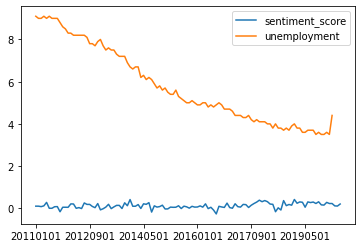

In [21]:
employment_analytics['employment']= employment_analytics['unemployment'].fillna(method='ffill')
employment_analytics['growth rate']= employment_analytics['growth rate'].fillna(method='ffill')
employment_analytics['fed interest rate']= employment_analytics['fed interest rate'].fillna(method='ffill')
employment_analytics[['sentiment_score','unemployment']].corr()
employment_analytics[['sentiment_score','unemployment']].plot()

In [22]:
employment_analytics['sentiment_score'] = employment_analytics['sentiment_score'] * (-1)
employment_analytics[['sentiment_score','employment']].corr()
employment_analytics['employment'] = employment_analytics['fed interest rate']

In [23]:
OLS(employment_analytics['employment'],employment_analytics['sentiment_score']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             employment   R-squared (uncentered):                   0.473
Model:                            OLS   Adj. R-squared (uncentered):              0.468
Method:                 Least Squares   F-statistic:                              101.2
Date:                Wed, 14 Jul 2021   Prob (F-statistic):                    2.17e-17
Time:                        20:03:39   Log-Likelihood:                         -128.36
No. Observations:                 114   AIC:                                      258.7
Df Residuals:                     113   BIC:                                      261.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
sentiment_score    -4.0282      0.400    -10.062      0.000      -4.821      -3.235
==============================================================================
Omnibus:                       13.565   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.657
Skew:                           0.783   Prob(JB):                     0.000657
Kurtosis:                       3.797   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
sentiment = pd.read_csv('sent_embedding_inflation_sentiment_0704_embed_12_layers.csv')
sentiment.sentence =sentiment.sentence.str.replace('"','')
merged_df = sentiment.merge(cos_similiarty, how = 'right', left_on = 'sentence', right_on = 'sentence')
merged_df = merged_df.loc[~merged_df.prediction.isna()]
merged_df = merged_df.groupby('date').mean('sentiment_score')
merged_df

,sentiment_score,Unnamed: 0,inflation,growth,employment,unemployment,economic
date,,,,,,,
20110107.0,-0.096356,6233.093750,0.561652,0.540467,0.536863,0.532765,0.543926
20110108.0,-0.089161,5997.706897,0.555297,0.532690,0.531287,0.525536,0.538569
20110202.0,-0.145310,5801.812500,0.562202,0.537580,0.536603,0.534429,0.547988
20110203.0,-0.083365,5671.157895,0.555536,0.530973,0.526316,0.523784,0.537253
20110210.0,-0.487014,11458.279070,0.558713,0.538257,0.544607,0.541828,0.545484
...,...,...,...,...,...,...,...
20200409.0,-0.046388,61515.250000,0.578266,0.558892,0.560114,0.559914,0.562471
20200513.0,-0.079850,61429.818182,0.564083,0.547647,0.547578,0.543994,0.552462
20200521.0,-0.163711,61356.083333,0.551456,0.531567,0.527771,0.523619,0.533478


In [25]:
merged_df.index =merged_df.index.astype(int)
merged_df.index = merged_df.index.astype(str)
merged_df['year'] = merged_df.index.str[:4]
merged_df['month'] = merged_df.index.str[4:6]
merged_df = merged_df.groupby(['year', 'month']).mean('sentiment_score')
merged_df

sentiment_score    Unnamed: 0  inflation    growth  employment  \
year month                                                                   
2011 01           -0.092758   6115.400323   0.558474  0.536578    0.534075   
     02           -0.237506   6540.209507   0.555116  0.534037    0.533943   
     03           -0.143012   5035.159569   0.557127  0.539147    0.542748   
     04           -0.111625   4322.068162   0.553870  0.536933    0.540606   
     05            0.317903   3582.782089   0.547322  0.529040    0.530397   
...                     ...           ...        ...       ...         ...   
2020 01            0.026697  62687.493750   0.564530  0.547122    0.547291   
     02            0.174571  61961.824224   0.561278  0.541405    0.542678   
     04           -0.046388  61515.250000   0.578266  0.558892    0.560114   
     05           -0.121780  61392.950758   0.557769  0.539607    0.537674   
     06            0.005071  61211.933333   0.559948  0.543467    0.543330   

            unemployment  economic  
year month                          
2011 01         0.529151  0.541247  
     02         0.530233  0.542300  
     03         0.535555  0.548214  
     04         0.535780  0.544132  
     05         0.523833  0.534971  
...                  ...       ...  
2020 01         0.539753  0.549998  
     02         0.535804  0.549282  
     04         0.559914  0.562471  
     05         0.533806  0.542970  
     06         0.537384  0.550342  

[109 rows x 7 columns]

In [26]:
inflation_sentiment = merged_df['sentiment_score'].reset_index()
inflation_sentiment.index = inflation_sentiment['year'] + inflation_sentiment['month'] + '01'
inflation_sentiment

,year,month,sentiment_score
20110101,2011,01,-0.092758
20110201,2011,02,-0.237506
20110301,2011,03,-0.143012
20110401,2011,04,-0.111625
20110501,2011,05,0.317903
...,...,...,...
20200101,2020,01,0.026697
20200201,2020,02,0.174571
20200401,2020,04,-0.046388
20200501,2020,05,-0.121780


In [27]:
inflation_data = pd.read_csv('inflation_data.csv').set_index('Date')
inflation_data['year'] = inflation_data.index.str[:4]
inflation_data['month'] = inflation_data.index.str[5:7]
inflation_data.index = inflation_data['year'] + inflation_data['month'] + '01'
inflation_data

,LF94TRUU INDEX,CIEFED Index,LBUTTRUU Index,T5YIFR Index,BXIIUB10 Index,BCIT1T Index,LTI1TRUU Index,CIEFMICH Index,BXIIUB05 Index,BCIT3T Index,year,month
20100101,258.2528,2.12,231.7004,2.75,106.4573,232.3311,208.67,2.94,106.9049,222.4283,2010,01
20100201,252.9232,2.10,229.0196,2.43,104.1744,229.5708,207.57,2.89,106.0411,221.2573,2010,02
20100301,255.1460,2.09,229.3187,2.65,105.4028,229.8983,207.54,2.87,106.7802,221.2315,2010,03
20100401,256.4777,2.11,234.7517,2.79,106.6034,235.5099,210.43,2.90,106.9218,224.3796,2010,04
20100501,247.5601,2.13,234.7366,2.29,103.1263,235.4047,209.76,2.95,105.4134,223.5656,2010,05
...,...,...,...,...,...,...,...,...,...,...,...,...
20210201,388.6440,NaN,347.7637,1.91,105.3685,352.8217,287.21,NaN,109.7401,306.8472,2021,02
20210301,387.4301,NaN,347.1061,2.20,107.9773,351.8814,287.68,NaN,110.8841,307.2928,2021,03
20210401,393.0050,NaN,351.9637,2.25,108.7011,357.1227,291.34,NaN,111.8982,311.4295,2021,04
20210501,404.8373,NaN,356.2265,2.27,109.5548,361.4996,294.06,NaN,112.4066,314.1971,2021,05


In [28]:
inflation_data = inflation_data.shift(1)
inflation_analytics = pd.concat([inflation_sentiment, inflation_data], axis = 1)
inflation_analytics = inflation_analytics.loc[~inflation_analytics.sentiment_score.isnull()]
inflation_analytics = inflation_analytics.sort_index()
inflation_analytics['sentiment_score'] = inflation_analytics['sentiment_score'].fillna(method='ffill')
inflation_analytics['CIEFMICH Index'] = inflation_analytics['CIEFMICH Index'].fillna(method='ffill')
inflation_analytics = inflation_analytics.loc[~inflation_analytics.sentiment_score.isnull()]
OLS(inflation_analytics['T5YIFR Index'],inflation_analytics['sentiment_score']).fit().summary()
inflation_analytics.to_csv('inflation_analytics.csv')

In [34]:
inflation_analytics = pd.read_csv('inflation_analytics_adjusted.csv')
inflation_analytics.rename(columns = {'LF94TRUU INDEX': 'inflation'}, inplace = True)

In [35]:
OLS(inflation_analytics['inflation'],inflation_analytics['sentiment_score']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              inflation   R-squared (uncentered):                   0.186
Model:                            OLS   Adj. R-squared (uncentered):              0.179
Method:                 Least Squares   F-statistic:                              24.70
Date:                Wed, 14 Jul 2021   Prob (F-statistic):                    2.53e-06
Time:                        20:48:03   Log-Likelihood:                         -773.01
No. Observations:                 109   AIC:                                      1548.
Df Residuals:                     108   BIC:                                      1551.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
sentiment_score   131.2212     26.402      4.970      0.000      78.888     183.555
==============================================================================
Omnibus:                       35.130   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.619
Skew:                          -1.457   Prob(JB):                     1.87e-13
Kurtosis:                       5.100   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
inflation_sentiment = pd.read_csv('sent_embedding_inflation_sentiment_0704_embed_12_layers.csv')
growth_sentiment = pd.read_csv('sent_embedding_growth_sentiment_0704_embed_12_layers.csv')
employment_sentiment = pd.read_csv('sent_embedding_employment_sentiment_0704_embed_12_layers.csv')

In [57]:
num_obs = pd.DataFrame([len(growth_sentiment.index),len(employment_sentiment.index),len(inflation_sentiment.index)], index = ['growth', 'employment', 'inflation'])
num_obs.columns = ['sentence_embedding']
num_obs.loc[ 'growth','sentence_embedding'] = 12404
num_obs['word_embedding'] = [22334, 12667, 36457-22334-12667]

In [59]:
num_obs.sum()

sentence_embedding    36457
word_embedding        36457
dtype: int64

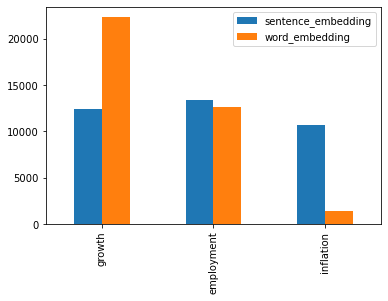

In [60]:
num_obs.plot.bar()